
# Modelado y Simulación 2020-1

## Método de Integración de Verlet

### Christopher Carmona Martínez - Juan Pablo Escobar Naranjo

El método de integración de Verlet, se aplica basicamente a ecuaciones diferenciales de segundo orden autónomas, es decir que del otro lado de la igualdad no aparece explícitamente la variable independiente x, ecuaciones en las que la segunda derivada de una función cualquiera es igual a algo que depende de la función original. Ecuaciones de la forma:


\begin{equation}
y"=F(y)
\end{equation}

El método de integración de Verlet, está basado en la expansión por series de Taylor

\begin{equation}
f\left( x \right)=\sum _{ n=0 }^{ \infty  }{ \frac { { f }^{ (n) }(a) }{ n! } { (x-a) }^{ n }=f(a)+\frac { f'(a) }{ 1! } { (x-a) }^{ 1 }+\frac { f''(a) }{ 2! } { (x-a) }^{ 2 }+... } 
\end{equation}

Una solución numérica es una sucesión de puntos $x_0$, $x_1$, $x_2$,... separados de forma discreta por un $\Delta x$ a lo largo del eje de la variable independiente. El valor $x_0$ va a ser el centro de la serie, sea cual sea la serie que vayamos a construir. Vamos a aproximar valores de $y$, evaluados en cualquier $x$ al rededor del punto $x_0$, donde $x_0$ es un punto cualquiera de la sucesión sobre la cual se va a calcular la solución numérica.

\begin{equation}
y\left( x \right) =\sum _{ n=0 }^{ \infty  }{ \\ \frac { { y }^{ (n) }({ x }_{ 0 }) }{ n! } { (x-{ x }_{ 0 }) }^{ n }=y({ x }_{ 0 })+\frac { y'({ x }_{ 0 }) }{ 1! } { (x-{ x }_{ 0 }) }^{ 1 }+\frac { y''({ x }_{ 0 }) }{ 2! } { (x-{ x }_{ 0 }) }^{ 2 }+...\\  } 
\end{equation}

Ahora bien, si aplicamos este principio para la discretización de la función, es decir, para  $(x+\Delta x)$ y $(x-\Delta x)$, tendríamos la siguiente ecuación:  

\begin{equation}
y\left( { x }_{ 0 }+\Delta x \right) =\sum _{ n=0 }^{ \infty  }{ \\ \frac { { y }^{ (n) }({ x }_{ 0 }) }{ n! } { (\Delta x) }^{ n }\\  } 
\end{equation}

\begin{equation}
y\left( { x }_{ 0 }+\Delta x \right) =\sum _{ n=0 }^{ \infty  }{ \\ \frac { { y }^{ (n) }({ x }_{ 0 }) }{ n! } { (-\Delta x) }^{ n }\\  } \\ \\ \quad 
\end{equation}

De manera más explícita, tendríamos lo siguiente: 

**Ecuación 1**
\begin{equation}
y\left( { x }_{ 0 }+\Delta x \right)=y({ x }_{ 0 })+y'({ x }_{ 0 })\Delta x+\frac { y''({ x }_{ 0 }) }{ 2! } { (\Delta x })^{ 2 }+\frac { y'''({ x }_{ 0 }) }{ 3! } { (\Delta x })^{ 3 }+\frac { y''''({ x }_{ 0 }) }{ 4! } { (\Delta x })^{ 4 }+...\\ 
\end{equation}

**Ecuación 2**

\begin{equation}
y\left( { x }_{ 0 }-\Delta x \right) =y({ x }_{ 0 })-y'({ x }_{ 0 })\Delta x+\frac { y''({ x }_{ 0 }) }{ 2! } { (\Delta x })^{ 2 }-\frac { y'''({ x }_{ 0 }) }{ 3! } { (\Delta x })^{ 3 }+\frac { y''''({ x }_{ 0 }) }{ 4! } { (\Delta x })^{ 4 }+... 
\end{equation}

Las series de Taylor tienen una propiedad, que indica que los términos de orden cada vez mayor, son así mismo cada vez menores,  considerando que $\Delta x$ es muy pequeño, puesto que los pasos de tiempo deben ser pequeños, dado que si $\Delta x\rightarrow 0$ , la solución numérica será mejor. En ese orden de ideas, los términos ${ (\Delta x) }^{ n }$ , son cada vez más pequeños. Lo que sugiere que entre más términos sume, esos términos adicionales pesarán cada vez menos, por lo que a partir de cierto punto, podríamos despreciar dichos términos. 

Ahora, procedemos a sumar las **Ecuaciones 1 y 2**, obteniendo como resultado: 

**Ecuación 3**
\begin{equation}
y\left( { x }_{ 0 }+\Delta x \right) +y\left( { x }_{ 0 }-\Delta x \right) \approx 2y({ x }_{ 0 })+y''({ x }_{ 0 }){ \Delta x }^{ 2 }
\end{equation}

Así obtuvimos una aproximación de la segunda derivada en términos de la función evaluada en diferentes puntos. La idea es que en Verlet, un cierto instante se va a poder calcular si conocíamos los dos instantes anteriores, así: 

\begin{equation}
y\left( { x }_{ 0 }+\Delta x \right) { \rightarrow y }_{ i+1 }\\ y({ x }_{ 0 })\rightarrow { y }_{ i }\\ y\left( { x }_{ 0 }-\Delta x \right) \rightarrow { y }_{ i-1 }
\end{equation}

Es decir, calcularemos ${ y }_{ i+1 }$, en términos de  ${ y }_{ i }$ y de  ${ y }_{ i-1 }$

Si reescribimos la **Ecuación 3** obtenemos: 

\begin{equation}
{ y }_{ i+1 }+{ y }_{ i-1 }=2{ y }_{ i }+{ { y }_{ i } }''{ \Delta x }^{ 2 }
\end{equation}

Así obtenemos el instante futuro, en términos de los dos instantes anteriores: 

**Ecuación 4**
\begin{equation}
\quad { y }_{ i+1 }=2{ y }_{ i }-{ y }_{ i-1 }+{ { y }_{ i } }''{ \Delta x }^{ 2 }
\end{equation}

Como mencionamos al principio, el método de Verlet se aplica a ecuaciones del tipo $y"=f(y)$, y con esto, podríamos decir que: 

**Fórmula del algoritmo de Verlet**

\begin{equation}
\quad { y }_{ i+1 }=2{ y }_{ i }-{ y }_{ i-1 }+{ { F(y }_{ i }) }{ \Delta x }^{ 2 }
\end{equation}

Este mecanismo tiene un problema, cuando se va a realizar la primera iteración del método numérico, no se tienen los dos instantes previos a este. Para solucionar este problema, se crea un paso artificial $x_{-1}$ y un valor artificial $y_{-1}$, usando una serie de Taylor hacia atrás. En el método de Verlet esto se conoce como el paso inicial de arranque. A partir de $y_0$, puedo calcular $y_{-1}$, tomando los otros términos de la serie de Taylor, así: 

**Arranque**

\begin{equation}
{ y }_{ -1 }={ y }_{ 0 }-{ y }_{ 0 }'\Delta x-\frac { 1 }{ 2 } { y }_{ 0 }''{ \Delta x }^{ 2 }
\end{equation}

\begin{equation}
{ y }_{ -1 }={ y }_{ 0 }-{ y }_{ 0 }'\Delta x-\frac { 1 }{ 2 } F({ y }_{ 0 }){ \Delta x }^{ 2 }
\end{equation}

El paso de arranque configura un valor artificial para poder aplicar el método.

Un Problema de Valor Inicial de segundo orden, estaría dado entonces por: 

\begin{equation}
 y''=F(y)\\ y(0)=\alpha \\ y'(0)=\beta  
\end{equation}

Se discretiza de manera similar al método de Euler, y después se aplica el siguiente algoritmo: 

\begin{equation}
y(0)=\alpha \\ { y }_{ -1 }={ y }_{ 0 }-\beta \Delta x+\frac { 1 }{ 2 } F({ y }_{ 0 }){ \Delta x }^{ 2 }\\ { y }_{ i+1 }=2{ y }_{ i }-{ y }_{ i-1 }+F({ y }_{ i }){ \Delta x }^{ 2 }
\end{equation}

### Algoritmo computacional para el método de Integración de Verlet

In [24]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

def verlet(f,a,b,xf,niter):
    dx = xf/(niter-1)
    xs = np.arange(0,xf+dx,dx)
    ys = np.zeros(np.size(xs))
    yinit = a-dx*b+0.5*dx*dx*f(a) # paso de arranque
    ys[0] = yinit
    ys[1] = a
    for i in range(1,niter-1):
        ys[i+1] = 2*ys[i]-ys[i-1]+f(ys[i])*pow(dx,2)
    return xs, ys

### Ejemplo de Implementación 

#### Problema de caída libre

Se suelta un objeto (inicialmente en reposo) desde una altura de 50 metros. 

\begin{equation}
y''=-g\\ y(0)=50\\ y'(0)=0
\end{equation}



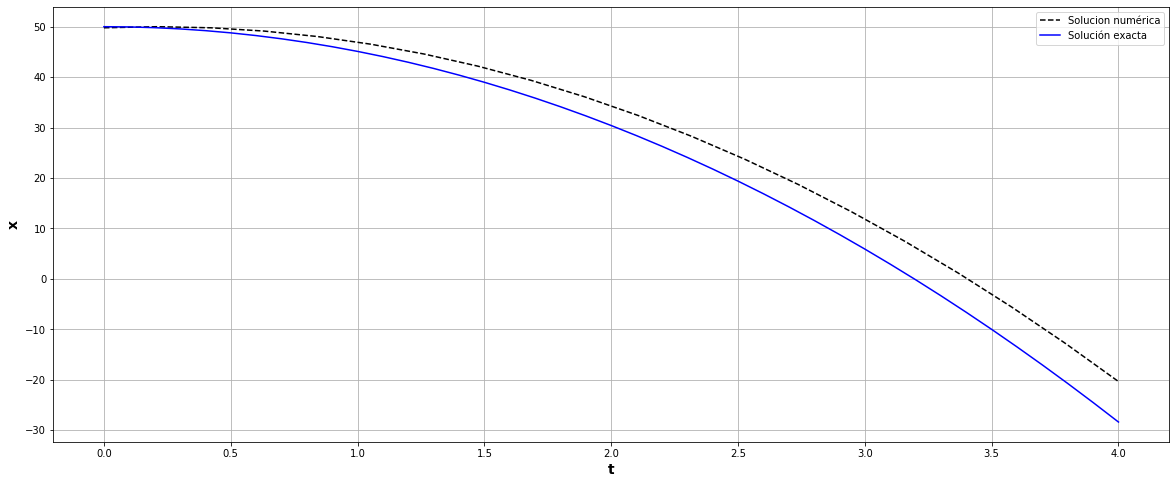

In [25]:
def f(y):
    return -9.8

pos0 = 4
t, y = verlet(f,50.0,0.0,pos0,20)

def sol_ex(t):
    return 50-4.9*pow(t,2)

t_ex = np.arange(0.0,pos0+0.1,0.1)
y_ex = np.zeros(np.size(t_ex))
for i in range(np.size(t_ex)):
    y_ex[i] = sol_ex(t_ex[i])

plt.figure(figsize = (20, 8))
plt.grid()
plt.xlabel('t', fontweight = 'bold', fontsize = 14)
plt.ylabel('x', fontweight = 'bold', fontsize = 14)
plt.plot(t,y,'k--',label = 'Solucion numérica')
plt.plot(t_ex,y_ex,'b',label = 'Solución exacta')
plt.legend()